In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
path = "Park Unit Scraping Information.csv"
regionlookup = pd.read_csv(path, encoding='latin-1')
regionlookup.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Alagnak,Alagnak Wild River,Wild River,AK,AKR,ALAG,1
1,Aniakchak,Aniakchak National Monument and Preserve,National Monument & Preserve,AK,AKR,ANIA,2
2,Bering Land Bridge,Bering Land Bridge National Preserve,National Preserve,AK,AKR,BELA,1
3,Cape Krusenstern,Cape Krusenstern National Monument,National Monument,AK,AKR,CAKR,1
4,Denali,Denali National Park and Preserve,National Park & Preserve,AK,AKR,DENA,2


In [3]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/roadevents?api_key=3AidKP0PiqgfP8sbwZC0RZ9JM6QDnvYaZx3RRjrH')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [4]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [5]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [6]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(14, 56, 12)

In [7]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []
id_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Alert ID: ", x['properties']['core_details']['data_source_id'])
  #  print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    id_list.append(x['properties']['core_details']['data_source_id'])
   # end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive, and East Rim Drive are CLOSED for the season.  
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'Pinnacles Road', 'Grayback Road', 'West Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive, and East Rim Drive are CLOSED for the season.  
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'Pinnacles Road', 'Grayback Road', 'West Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive, and East Rim Drive are CLOSED for the season.  
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'P

In [8]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "alert_id": id_list
#    "event end date": end_date_list
})
df_update.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id
0,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
1,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
2,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
3,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
4,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2


In [9]:
regionlookup.rename(columns={'Park Full Name':"park", "Reg":"region","Alpha":"alpha"}, inplace = True)
region_subset = regionlookup[['park', 'region', 'alpha', "State"]]
region_subset.head()

,park,region,alpha,State
0,Alagnak Wild River,AKR,ALAG,AK
1,Aniakchak National Monument and Preserve,AKR,ANIA,AK
2,Bering Land Bridge National Preserve,AKR,BELA,AK
3,Cape Krusenstern National Monument,AKR,CAKR,AK
4,Denali National Park and Preserve,AKR,DENA,AK


In [10]:
merged_df = pd.merge(df_update, region_subset, on="park", how="inner")
merged_df.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id,region,alpha,State
0,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
1,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
2,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
3,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
4,2024-04-26,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"[North Entrance Road, East Rim Drive, Pinnacle...",all-lanes-closed,2023-11-02T02:19:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR


In [11]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [12]:
df_update = pd.concat([merged_df, df_old_update])
df_update['date'] = pd.to_datetime(df_update.date)


In [13]:
null_region_count = merged_df['region'].isnull().sum()
null_region_count

0

In [14]:
if null_region_count == 0:
    df_update.to_csv("./TDx_tracker.csv", index=False)
else:
    null_region_rows = joined[joined['region'].isnull()]
    print("Rows with a null Region column:")
    print(null_region_rows)

In [15]:
path = "Park Unit Scraping Information.csv"
parks = pd.read_csv(path, encoding='latin-1')
parks.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Alagnak,Alagnak Wild River,Wild River,AK,AKR,ALAG,1
1,Aniakchak,Aniakchak National Monument and Preserve,National Monument & Preserve,AK,AKR,ANIA,2
2,Bering Land Bridge,Bering Land Bridge National Preserve,National Preserve,AK,AKR,BELA,1
3,Cape Krusenstern,Cape Krusenstern National Monument,National Monument,AK,AKR,CAKR,1
4,Denali,Denali National Park and Preserve,National Park & Preserve,AK,AKR,DENA,2


In [16]:
df_update.park.value_counts()

Crater Lake National Park                     138
Great Smoky Mountains National Park            94
Mojave National Preserve                       79
Yosemite National Park                         70
Death Valley National Park                     62
Shenandoah National Park                       54
Zion National Park                             34
Organ Pipe Cactus National Monument            22
Guadalupe Mountains National Park              22
Dinosaur National Monument                     20
Buffalo National River                         20
Redwood National Park                          19
Black Canyon of the Gunnison National Park     18
Ozark National Scenic Riverways                18
Sleeping Bear Dunes National Lakeshore         16
Bryce Canyon National Park                     12
Padre Island National Seashore                  8
Acadia National Park                            7
Point Reyes National Seashore                   6
Golden Gate National Recreation Area            6


In [17]:
len(df_update.park.unique())

26

In [18]:
running_park_list = []
date_list = []
park_count_list = []

df_update = df_update.sort_values(by=['date'])

for x in df_update.date.unique():
    df_date = df_update.loc[df_update['date']==x]
    print(x, ": ", len(df_date))
    for y in df_date['park']:
        if y not in running_park_list:
            print(y)
            running_park_list.append(y)
    date_list.append(x)
    park_count_list.append(len(running_park_list))

2023-10-17T00:00:00.000000000 :  11
Olympic National Park
Yosemite National Park
Mojave National Preserve
Acadia National Park
Dinosaur National Monument
Natchez Trace Parkway
Golden Gate National Recreation Area
2023-10-23T00:00:00.000000000 :  11
2023-11-27T00:00:00.000000000 :  4
Padre Island National Seashore
2023-12-18T00:00:00.000000000 :  4
Fort Point National Historic Site
Muir Woods National Monument
2023-12-28T00:00:00.000000000 :  3
2024-01-04T00:00:00.000000000 :  3
2024-01-11T00:00:00.000000000 :  5
Shenandoah National Park
2024-01-18T00:00:00.000000000 :  4
2024-01-25T00:00:00.000000000 :  3
2024-02-01T00:00:00.000000000 :  8
2024-02-05T00:00:00.000000000 :  61
Redwood National Park
Organ Pipe Cactus National Monument
Death Valley National Park
Valley Forge National Historical Park
Guadalupe Mountains National Park
Zion National Park
Bryce Canyon National Park
Point Reyes National Seashore
Crater Lake National Park
2024-03-04T00:00:00.000000000 :  83
Buffalo National Rive

In [19]:
df_count = pd.DataFrame({
    'date': date_list,
    "count of parks": park_count_list
})
df_count['date'] = pd.to_datetime(df_count['date'])


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[]

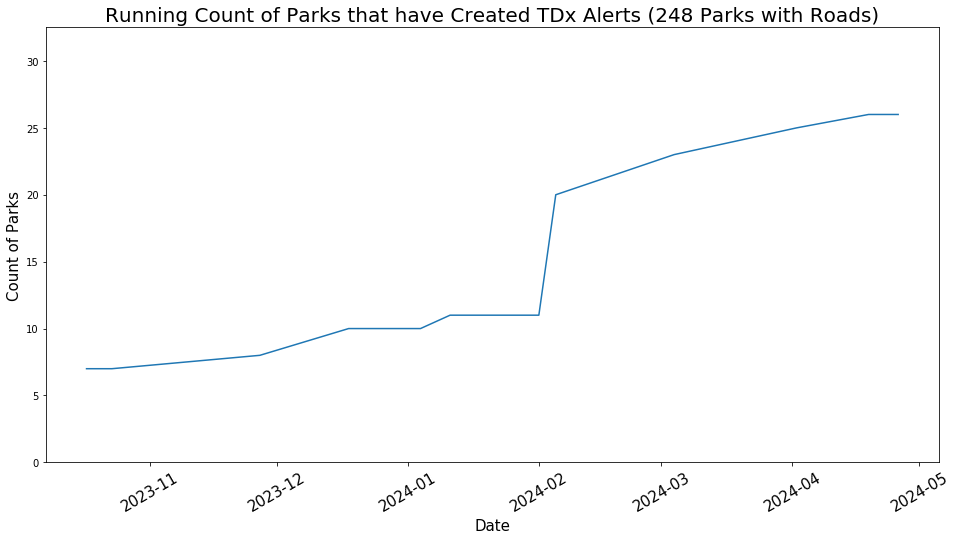

In [20]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 8))

# Creating a plot
plt.plot(df_count.date, df_count['count of parks'])

# Adding a plot title and customizing its font size
plt.title('Running Count of Parks that have Created TDx Alerts (248 Parks with Roads)', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Count of Parks', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=15)
plt.ylim([0,max(df_count['count of parks'])*1.25])

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
#plt.xlim(pd.Timestamp('2023-09-1'), pd.Timestamp('2024-02-15'))
plt.plot()


## Alerts

In [21]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/alerts?limit=1000&api_key=3AidKP0PiqgfP8sbwZC0RZ9JM6QDnvYaZx3RRjrH')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [22]:
id_list = []
url_list = []
title_list = []
parkCode_list = []
description_list = []
category_list = []
relatedRoadEvents_list = []
lastIndexedDate_list = []

for x in df['data']:
    #print(x)
    id_list.append(x['id'])
    url_list.append(x['url']) 
    title_list.append(x['title']) 
    parkCode_list.append(x['parkCode'].upper()) 
    description_list.append(x['description'])
    category_list.append(x['category']) 
    relatedRoadEvents_list.append(x['relatedRoadEvents'])
    lastIndexedDate_list.append(x['lastIndexedDate'])


In [23]:
alerts_df = pd.DataFrame({
    'id': id_list, 
    'url': url_list, 
    'title': title_list,
    'park alpha': parkCode_list,
    'description': description_list,
    'category': category_list,
    'relatedRoadEvents':relatedRoadEvents_list,
    'LastIndexedDate':lastIndexedDate_list
})

In [24]:
alerts_df2 = alerts_df.merge(parks,left_on='park alpha', right_on="Alpha", how = "left")

In [25]:
road_closed_flag_list = []
road_words_list = ["road", "route", "interstate", "highway", "vehic"]

for x in range(len(alerts_df2)): 
    road_closed_flag = "No"
    
    for y in road_words_list:
        if y in str(alerts_df2["description"][x].lower()):
            road_closed_flag = "Yes"
            break
            
    road_closed_flag_list.append(road_closed_flag)

alerts_df2["Road Closed Flag"] = road_closed_flag_list

In [26]:
# add to alerts tracker table
alerts_df2['date'] = today_string
alerts_df2_old = pd.read_csv("./alerts_api_tracker.csv")
alerts_df2_combined = pd.concat([alerts_df2, alerts_df2_old])
alerts_df2_combined.to_csv("alerts_api_tracker.csv", index=False)

##### Create a tracking table

NPS wants to know how many total road closures there are, and how many of these are included in the TDx feed. For this, we can subset our alerts table for road closure alerts then compare our 2 tables. 

In [27]:
# filter our alerts table to only include road closures
alerts_df3 = alerts_df2.loc[alerts_df2['Road Closed Flag']=="Yes"]

# group by our park-related fields and create sub-lists for our alert info
alerts_df3_grouped = alerts_df3.groupby(['park alpha','Park Name', 'Park Full Name',
       'Type of Unit', 'State','Reg'])['title', 'description', 'category',
       'relatedRoadEvents'].agg(lambda x: list(x)).reset_index()

In [28]:
# create list of the unique park alphas in our two tables
has_alerts = set(alerts_df3['park alpha'])
has_tdx = set(merged_df['alpha'])

# create sublists of overlapping alphas, only in alerts table, only in TDx table
has_both = has_alerts.intersection(has_tdx)
only_alerts = has_alerts - has_tdx
only_tdx = has_tdx - has_alerts

#create empty data frame then populate the rows
status = pd.DataFrame(columns=['Park Alpha', 'Status'])
status['Park Alpha'] = list(has_both) + list(only_alerts) + list(only_tdx)
status['Status'] = (['Using TDx feed and alerts'] * len(has_both)) + (['Only using alerts'] * len(only_alerts)) + (['Only using TDx feed'] * len(only_tdx))

In [29]:
# join our status table with our alerts table
status_merged = status.merge(alerts_df3_grouped,left_on='Park Alpha', right_on="park alpha", how = "left")

In [30]:
status_merged['Status'].value_counts()

Only using alerts            110
Using TDx feed and alerts     13
Only using TDx feed            1
Name: Status, dtype: int64

In [31]:
status_merged.to_csv("combined_status.csv", index=False)

#### Create a tracker spreadsheet with the combined updates

In [32]:
df_update_combined = status_merged
df_update_combined['date'] = today_string

In [33]:
df_old_update = pd.read_csv("./combined_status_tracker.csv")

In [34]:
df_update_combined = pd.concat([df_update_combined, df_old_update])

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
df_update_combined.to_csv("combined_status_tracker.csv", index=False)